# 使用PCA对人脸图片进行处理

此部分作业要求使用PCA技术对给定的人脸数据集进行处理，你需要在该文件中完成你的代码，并输出结果。



本次使用到的人脸数据集是 ORL人脸数据集，共包含40个不同人的400张图像。此数据集下包含40个目录，每个目录下有10张图像，每个目录表示一个不同的人。所有的图像是以PGM格式存储，灰度图，图像大小宽度为92，高度为112。



数据集中部分图像示例：

![image-20230428112024592](./faces.png)



在本次作业中，你需要**按顺序**完成以下内容并且在该文件中**保留要求**的输出结果：

1. 将数据集划分为80%的训练集，20%的测试集，在训练集上使用PCA将特征维度降为100，即得到100个特征和其对应的特征向量，并使用训练得到的PCA将测试集维度也压缩到100，**输出：压缩后的训练集维度和测试集维度、经过PCA得到的特征向量维度**。

2. 得到100个特征向量后，**使用这些向量重建特征脸并输出**。示例：

   ![image2](./feature.png)

3. 使用这100个特征和对应的特征向量，自行在训练集和测试集中**分别**选择**5张**人脸图片进行人脸重建并**输出对比图**。示例：

   ![image2](./restore.png)

4. **输出**降维后**每个**新特征向量所占的信息量占原始数据总信息量的百分比，以及所有返回特征所携带的**信息量总和**是原始数据的多少；

5. **画出**特征个数和所携带信息数的曲线图，此处特征数**上限设置为150**，此处以150为示例：

   ![image2](./information.png)

6.  保留特征数为150，得到的训练集每次保留前（n=n+1，n初值为1）个特征，分别训练一个KNN分类器，KNN分类器的参数*n_neighbors*为3，观察并验证测试集在使用其前n个特征时KNN分类的准确率。**注意：此处仅进行一次PCA**,输出：不同的特征保留数和准确率的曲线图。此处以*n_neighbors=5*为示例：

   ![image2](./acc.png)

   **本次作业严禁抄袭，一经发现严肃处理**


#  附加题

若感兴趣，可以自行拍摄自己或舍友的人脸照片、或者其他较为简单且特征明显的数据集进行PCA操作。


In [1]:
# 本次作业你可能需要用到的包和函数

%matplotlib inline
# 导入所需模块
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# plt显示灰度图片
def plt_show(img):
    plt.imshow(img,cmap='gray')
    plt.show()

# 读取一个文件夹下的所有图片，输入参数是文件名，返回文件地址列表
def read_directory(directory_name):
    faces_addr = []
    for filename in os.listdir(directory_name):
        faces_addr.append(directory_name + "/" + filename)
    return faces_addr

In [2]:
X = []
y = []
data_dir = "data"
# 读取图片
for index in range(1, 41):
    person_addr = data_dir + "/" + "s" + str(index)
    for face_addr in read_directory(person_addr):
        face_img = cv2.imread(face_addr, cv2.IMREAD_GRAYSCALE)
        X.append(face_img.flatten()) # 存储每张图片
        y.append(index) # 存储每张图片对应的人的标签

X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=999999)

pca = PCA(n_components=100)
pca = pca.fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
eigen_images = pca.components_

print(f"压缩后的训练集维度为：{X_train_pca.shape}")
print(f"压缩后的测试集维度为：{X_test_pca.shape}")
print(f"经过PCA得到的特征向量维度为：{eigen_images.shape}")

压缩后的训练集维度为：(320, 100)
压缩后的测试集维度为：(80, 100)
经过PCA得到的特征向量维度为：(100, 10304)


将100个特征向量重建特征脸并输出，结果如下：


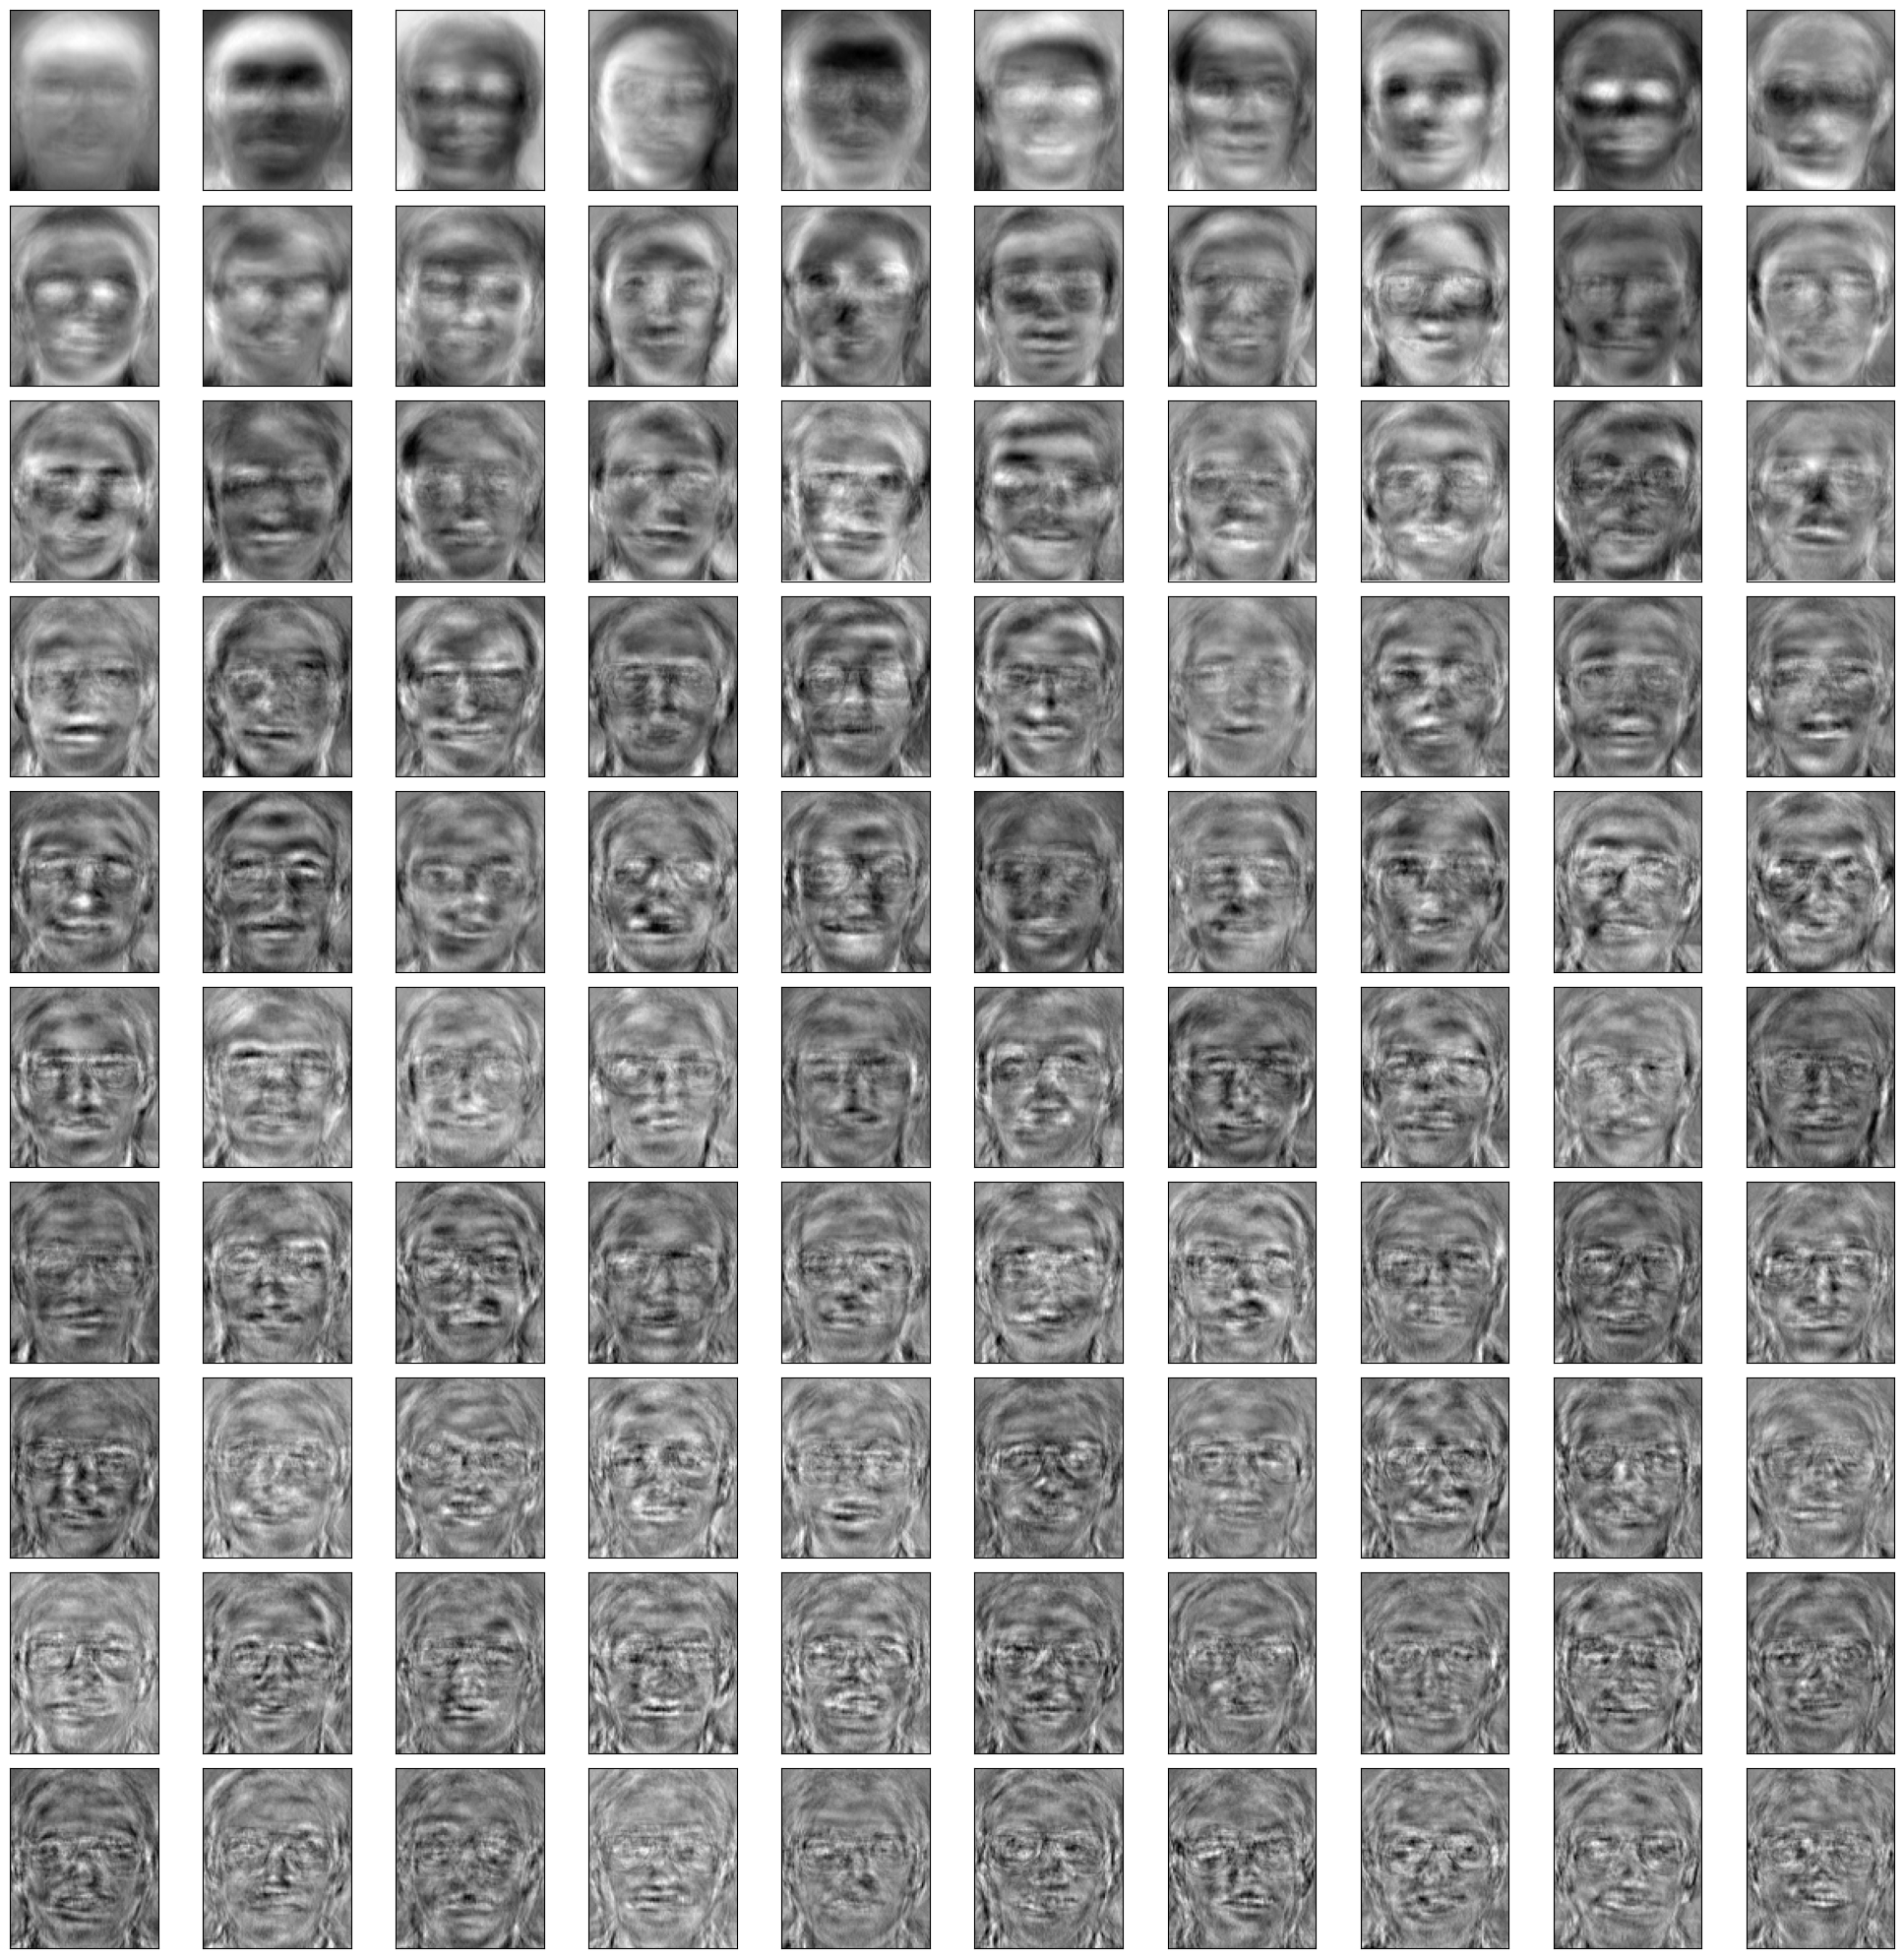

In [3]:
width = 92
height = 112

# 自定义一个新的函数，用于排列并打印多个子图
def display_multi_plots(images, width, height, num_rows, num_cols):
    _, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20,20))

    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i].reshape(height, width), cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])

    plt.tight_layout()
    plt.show()

print("将100个特征向量重建特征脸并输出，结果如下：")
display_multi_plots(eigen_images, width, height, 10, 10)

从训练集中选择5张人脸图片进行重建，对比图如下所示：


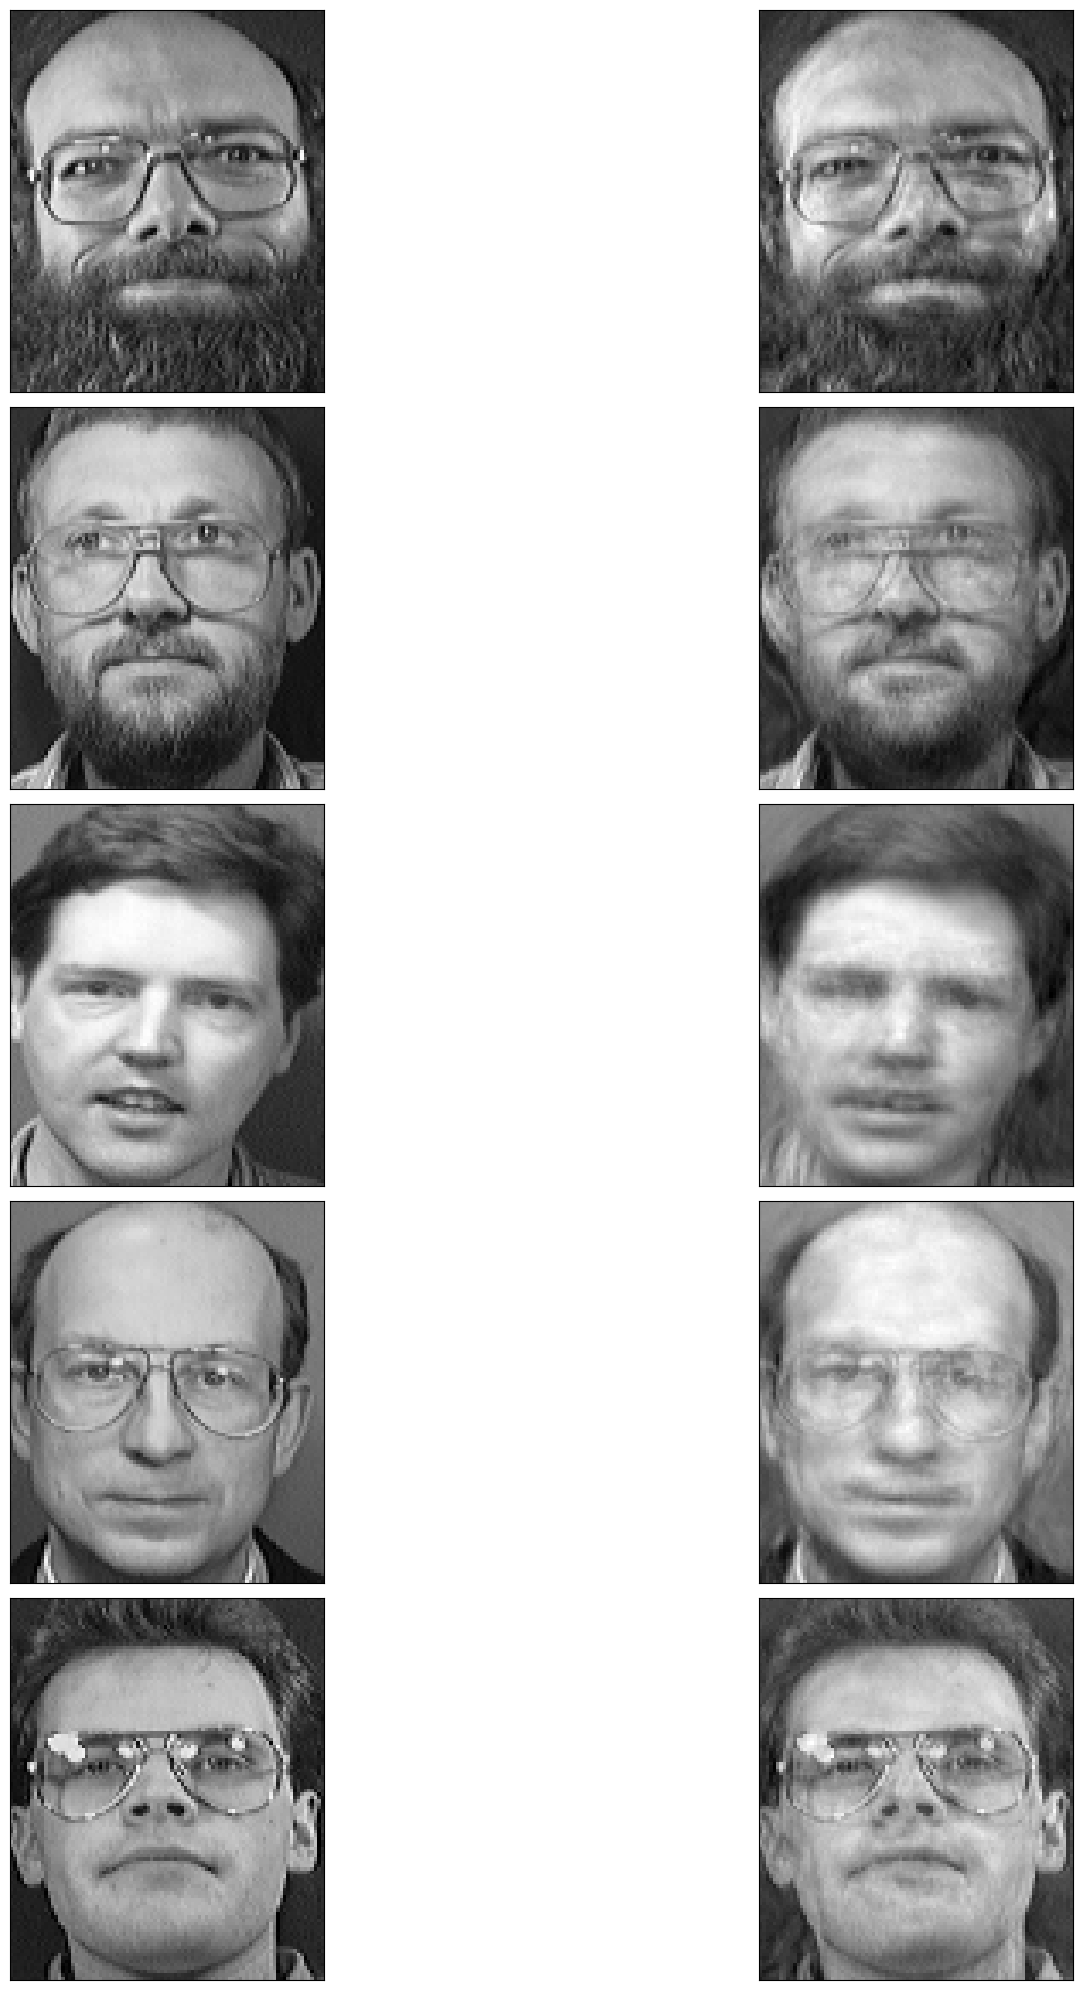

In [4]:
print("从训练集中选择5张人脸图片进行重建，对比图如下所示：")
train_sample_idx = np.random.choice(np.arange(len(X_train_pca)), size=5, replace=False)
images = []
for sample_idx in train_sample_idx:
    images.append(X_train[sample_idx])
    images.append(pca.inverse_transform(X_train_pca[sample_idx]))
display_multi_plots(images, width, height, 5, 2)

从测试集中选择5张人脸图片进行重建，对比图如下所示：


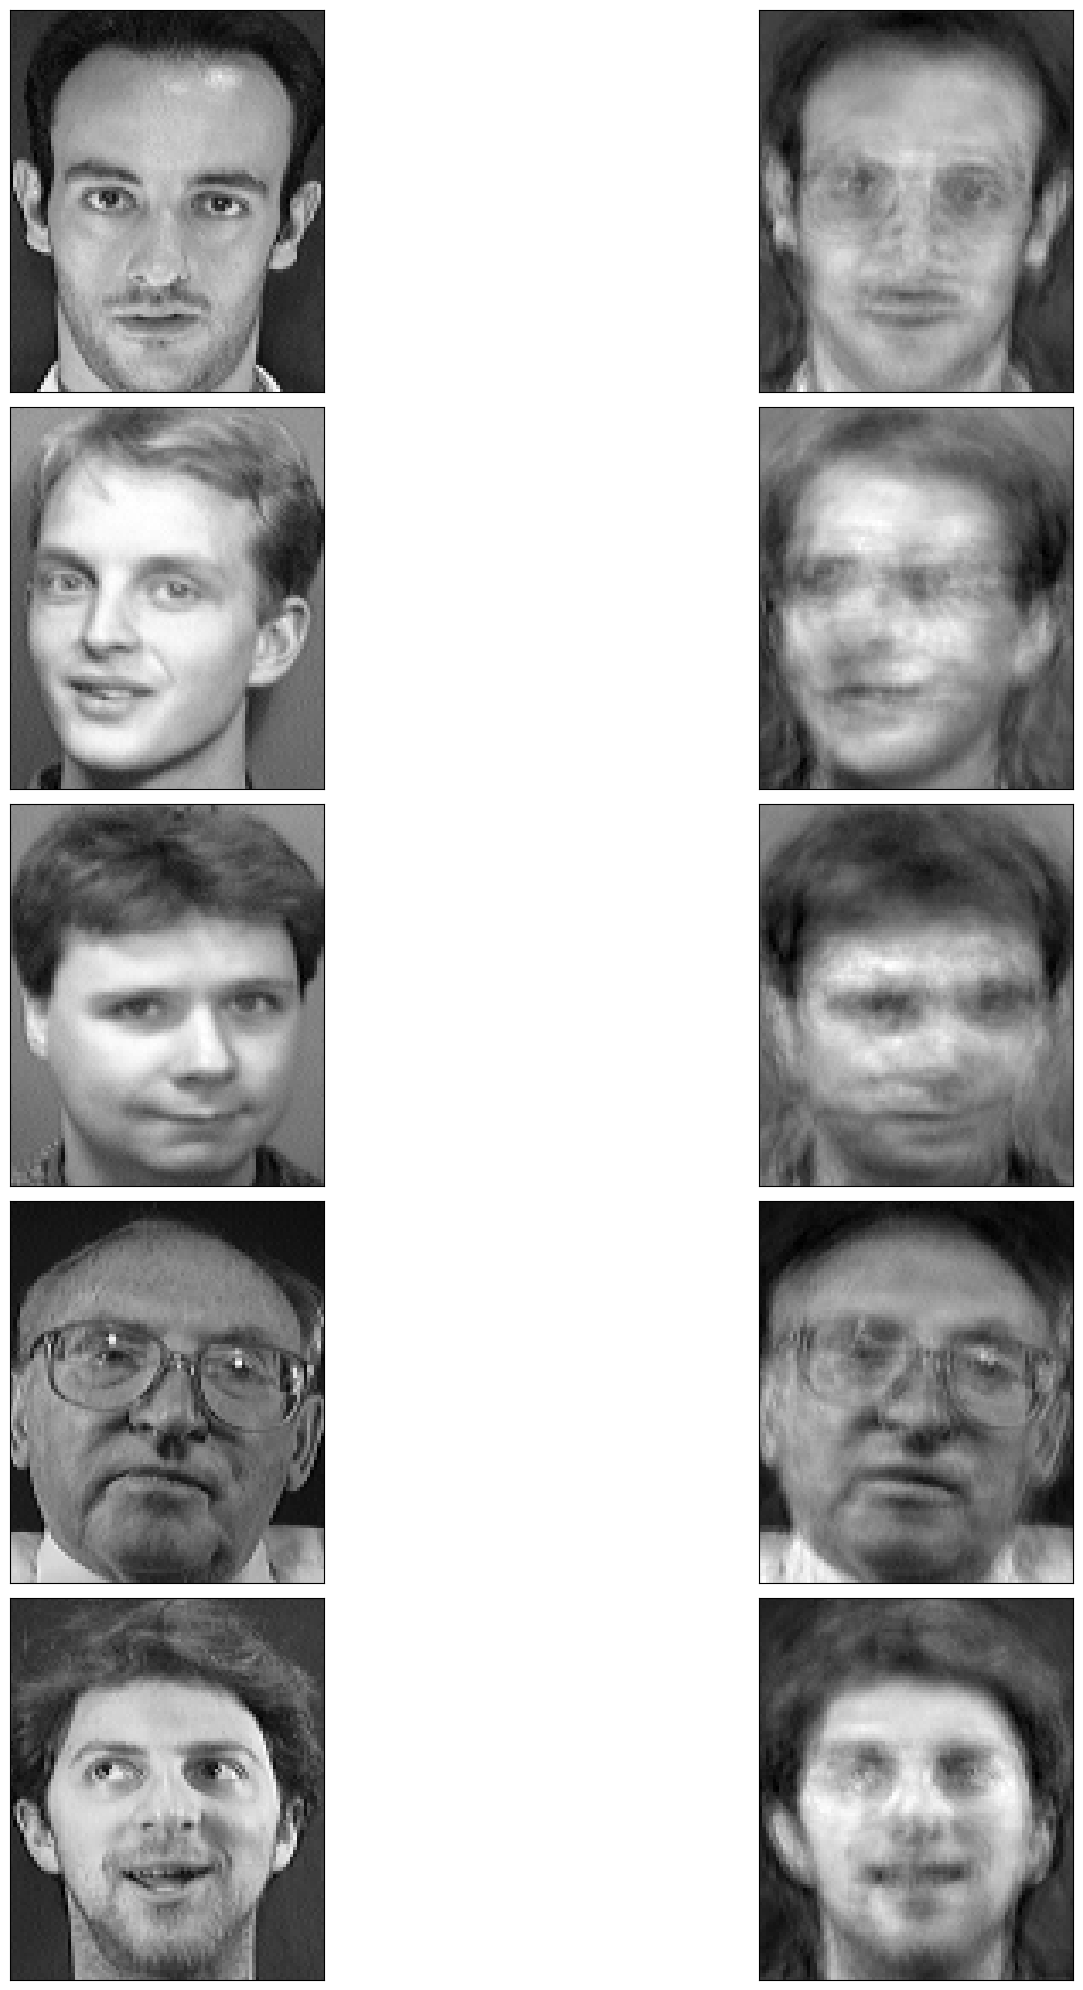

In [5]:
print("从测试集中选择5张人脸图片进行重建，对比图如下所示：")
test_sample_idx = np.random.choice(np.arange(len(X_test_pca)), size=5, replace=False)
images = []
for sample_idx in test_sample_idx:
    images.append(X_test[sample_idx])
    images.append(pca.inverse_transform(X_test_pca[sample_idx]))
display_multi_plots(images, width, height, 5, 2)

In [6]:
print("输出降维后每个新特征向量所占的信息量占原始数据总信息量的百分比：（从1开始计数）")
explained_variance_ratio = pca.explained_variance_ratio_
total_ratio = 0
for i in range(len(explained_variance_ratio)):
    print(f"第{i+1:3}个新特征向量占原始数据总信息量的百分比为 {explained_variance_ratio[i]:.4%}")
    total_ratio += explained_variance_ratio[i]

print(f"所有返回特征所携带的信息量总和是原始数据的百分比为 {total_ratio:.4%}")

输出降维后每个新特征向量所占的信息量占原始数据总信息量的百分比：（从1开始计数）
第  1个新特征向量占原始数据总信息量的百分比为 18.3594%
第  2个新特征向量占原始数据总信息量的百分比为 12.6185%
第  3个新特征向量占原始数据总信息量的百分比为 6.8586%
第  4个新特征向量占原始数据总信息量的百分比为 5.7837%
第  5个新特征向量占原始数据总信息量的百分比为 5.0859%
第  6个新特征向量占原始数据总信息量的百分比为 3.3105%
第  7个新特征向量占原始数据总信息量的百分比为 2.4900%
第  8个新特征向量占原始数据总信息量的百分比为 2.1998%
第  9个新特征向量占原始数据总信息量的百分比为 1.9276%
第 10个新特征向量占原始数据总信息量的百分比为 1.8194%
第 11个新特征向量占原始数据总信息量的百分比为 1.5188%
第 12个新特征向量占原始数据总信息量的百分比为 1.4388%
第 13个新特征向量占原始数据总信息量的百分比为 1.1361%
第 14个新特征向量占原始数据总信息量的百分比为 1.0897%
第 15个新特征向量占原始数据总信息量的百分比为 0.9853%
第 16个新特征向量占原始数据总信息量的百分比为 0.9441%
第 17个新特征向量占原始数据总信息量的百分比为 0.8886%
第 18个新特征向量占原始数据总信息量的百分比为 0.8620%
第 19个新特征向量占原始数据总信息量的百分比为 0.7535%
第 20个新特征向量占原始数据总信息量的百分比为 0.7411%
第 21个新特征向量占原始数据总信息量的百分比为 0.6923%
第 22个新特征向量占原始数据总信息量的百分比为 0.5997%
第 23个新特征向量占原始数据总信息量的百分比为 0.5878%
第 24个新特征向量占原始数据总信息量的百分比为 0.5754%
第 25个新特征向量占原始数据总信息量的百分比为 0.5370%
第 26个新特征向量占原始数据总信息量的百分比为 0.5105%
第 27个新特征向量占原始数据总信息量的百分比为 0.4905%
第 28个新特征向量占原始数据总信息量的百分比为 0.4699%
第 29个新特征向量占原始数据总信息量的百分比为 0.4600%


画出特征个数和所携带信息数的曲线图：（特征数上限为150）


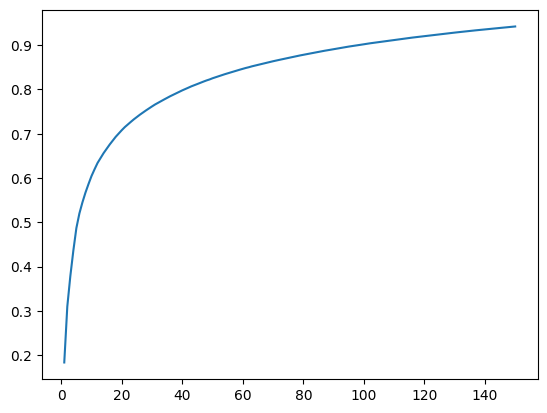

In [7]:
print("画出特征个数和所携带信息数的曲线图：（特征数上限为150）")
num_features = []
total_ratios = []
for i in range(1, 151):
    pca = PCA(n_components=i)
    pca = pca.fit(X_train)
    num_features.append(i)
    total_ratios.append(np.sum(pca.explained_variance_ratio_))
plt.plot(num_features, total_ratios)
plt.show()

可绘制出不同的特征保留数和准确率的曲线图如下：


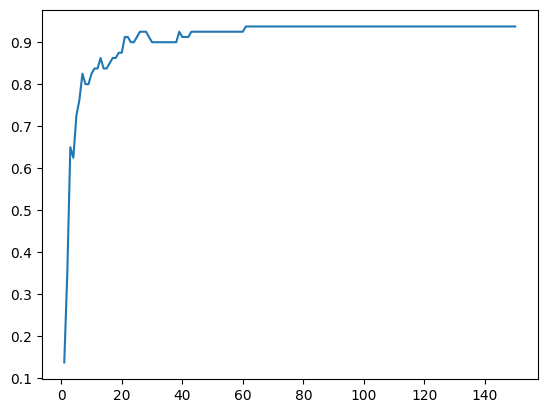

In [8]:
# 保留特征数设为150，仅进行一次PCA
pca = PCA(n_components=150)
pca = pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# 初始化KNN分类器
knn = KNeighborsClassifier(n_neighbors=3)

n_list = []
accuracy_list = []

for n in range(1, 151):
    # 训练集每次保留前n个特征，训练一个KNN分类器
    knn.fit(X_train_pca[:, :n], y_train)

    # 观察并验证测试集在使用其前n个特征时KNN分类的准确率
    y_pred = knn.predict(X_test_pca[:, :n])
    accuracy = np.mean(y_pred == y_test)

    n_list.append(n)
    accuracy_list.append(accuracy)

print("可绘制出不同的特征保留数和准确率的曲线图如下：")
plt.plot(n_list, accuracy_list)
plt.show()